In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
baslik = ["KullaniciId","FilmId","Degerlendirme","ZamanDamgasi"]
df = pd.read_csv("u.data",sep="\t",names=baslik)
KullaniciSayisi = df.KullaniciId.unique().shape[0]
FilmSayisi=df.FilmId.unique().shape[0]
print(" Kullanıcı Sayısı = ",str(KullaniciSayisi),"\n","Film Sayısı      =",str(FilmSayisi))

 Kullanıcı Sayısı =  943 
 Film Sayısı      = 1682


In [3]:
df.head()

,KullaniciId,FilmId,Degerlendirme,ZamanDamgasi
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.Degerlendirme.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: Degerlendirme, dtype: int64

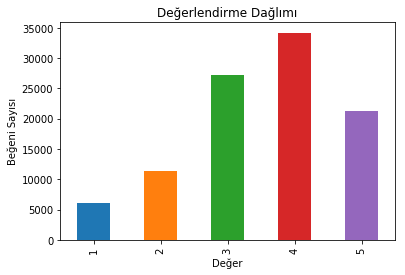

In [5]:
plot.rc("font",size=10)
df.Degerlendirme.value_counts(sort=False).plot(kind="bar")
plot.title("Değerlendirme Dağlımı")
plot.xlabel("Değer")
plot.ylabel("Beğeni Sayısı")
plot.show()

In [6]:
df.head()

,KullaniciId,FilmId,Degerlendirme,ZamanDamgasi
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df_ort = pd.DataFrame(round(df.groupby("KullaniciId")["Degerlendirme"].mean(),2))
df_ort["DsTemp"]=pd.DataFrame(df.groupby("FilmId")["Degerlendirme"].count())
df_ort.columns=["DegerOrtalamasi","DegerSayisi"]
df_ort.sort_values("DegerSayisi",ascending=False).head()

,DegerOrtalamasi,DegerSayisi
KullaniciId,,
50,3.54,583
258,3.74,509
100,3.07,508
181,1.49,507
294,3.47,485


In [8]:
k_u_matris = np.zeros((KullaniciSayisi,FilmSayisi))
for line in df.itertuples():
    k_u_matris[line[1]-1,line[2]-1] = line[3]
k_u_matris.shape


(943, 1682)

In [24]:
[line[1]-1:line[2]-1]

SyntaxError: invalid syntax (<ipython-input-24-6c9b8ef527d7>, line 1)

In [58]:
from sklearn.metrics.pairwise import pairwise_distances
kullanici_benzerlik =pairwise_distances(k_u_matris,metric="cosine")
kullanici_benzerlik.shape

(943, 943)

In [62]:
def tahmin(degerlendirme,benzerlik):
    ortalama_degerlendirme = degerlendirme.mean(axis=1)
    degerlendirme_farki = (degerlendirme-ortalama_degerlendirme[:,np.newaxis])
    tahmin = ortalama_degerlendirme[:,np.newaxis] + benzerlik.dot(degerlendirme_farki)/np.array([np.abs(benzerlik).sum(axis=1)]).T
    return tahmin

kullanici_tahmin = tahmin(k_u_matris,kullanici_benzerlik)
kullanici_tahmin.shape

(943, 1682)